# Exercício Prático: Classificação de Vinhos (Multiclasse)

**Objetivo:** Treinar uma Árvore de Decisão para identificar a origem do vinho com base nas suas propriedades químicas.

**Passo 1: Carregamento dos Dados (Offline)**
Vamos usar o dataset embutido no Scikit-Learn.
* **Features:** 13 medições químicas (Álcool, Ácido Málico, Cor, etc.).
* **Target:** 3 Classes de produtores (0, 1, 2).

**Passo 2: Treino do Modelo**
* Divida os dados em Treino e Teste (70/30).
* Treine um `DecisionTreeClassifier` (pode deixar os hiperparâmetros padrão).

**Passo 3: Visualização da Árvore**
* Use o `plot_tree` com `max_depth=2` para ver como a árvore toma decisões.
* **Pergunta:** Qual é a característica química mais discriminante (a Raiz da árvore)? É a cor? O álcool?

**Passo 4: Avaliação (Multiclasse)**
* Gere a Matriz de Confusão. Note que agora ela será 3x3.
* Analise o `classification_report`.
* O modelo consegue distinguir bem as 3 classes ou confunde alguma (ex: confunde a classe 1 com a 2)?

**Passo 5 (Otimização):**
* As árvores tendem a decorar (overfitting). Tente definir `max_depth=3`.
* A acurácia mantém-se? A árvore fica mais legível?

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Configuração para melhorar a resolução dos gráficos
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [3]:
from sklearn.datasets import load_wine

# 1. Carregar Dataset
data_wine = load_wine()
X_wine = data_wine.data
y_wine = data_wine.target

print(f"Features (ex): {data_wine.feature_names[:10]}")
print(f"Classes: {data_wine.target_names}")

# 2. Divisão Treino/Teste
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, stratify=y_wine, random_state=42
)

print(f"Treino: {X_train_wine.shape}, Teste: {X_test_wine.shape}")

Features (ex): ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity']
Classes: ['class_0' 'class_1' 'class_2']
Treino: (124, 13), Teste: (54, 13)


In [9]:
clf_wine = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_wine.fit(X_train_wine, y_train_wine)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

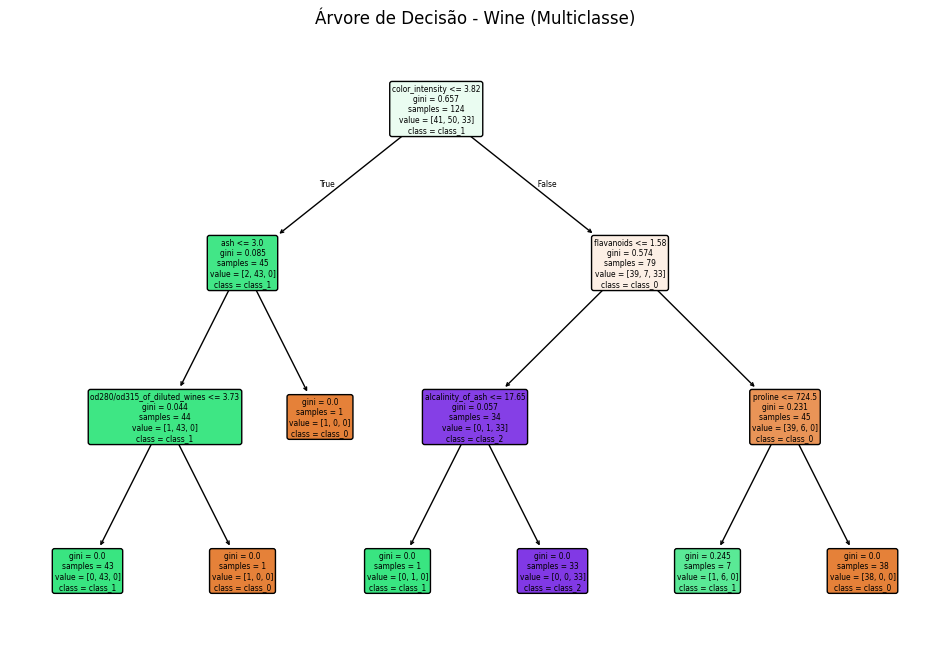

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(clf_wine,
          feature_names=data_wine.feature_names,
          class_names=data_wine.target_names,
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão - Wine (Multiclasse)")
plt.show()

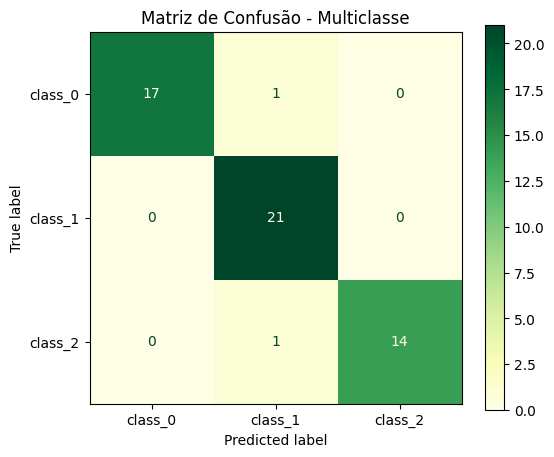

              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [11]:
y_pred_wine = clf_wine.predict(X_test_wine)

# Plotar Matriz 3x3
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test_wine, y_pred_wine,
    display_labels=data_wine.target_names,
    cmap='YlGn',
    ax=ax
)
plt.title("Matriz de Confusão - Multiclasse")
plt.show()

print(classification_report(y_test_wine, y_pred_wine, target_names=data_wine.target_names))